In [40]:
import numpy as np 

In [41]:
def load_dataset():
    data_mat = []; label_mat = []
    with open('testSet.txt') as fr:
        for line in fr.readlines():
            line_arr = line.strip().split()
            data_mat.append([1.0, float(line_arr[0]), float(line_arr[1])])
            label_mat.append(int(line_arr[2]))
    return np.array(data_mat), np.array(label_mat)

def sigmoid(inx):
    return 1.0/(1.0 + np.exp(-inx))

def grad_ascent(data_mat_in, classlabels):
    data_mat = np.mat(data_mat_in)
    label_mat = np.mat(classlabels).transpose()
    m, n = np.shape(data_mat)
    alpha = 0.001
    max_cycles = 500
    weights = np.ones((n,1))
    for k in range(max_cycles):
        h = sigmoid(data_mat * weights)
        error = (label_mat - h)
        weights = weights + alpha * data_mat.transpose() * error 
    return weights

In [42]:
data_arr, label_mat = load_dataset()
weights = grad_ascent(data_arr, label_mat)

In [45]:
def plot_best_fig(wei):
    import matplotlib.pyplot as plt 
    weights = np.array(wei)
    data_mat, label_mat = load_dataset()
    data_arr = np.array(data_mat)
    n = np.shape(data_arr)[0]
    x_cord1 = []; y_cord1 = []
    x_cord2 = []; y_cord2 = []
    for i in range(n):
        if (int(label_mat[i]) == 1):
            x_cord1.append(data_arr[i, 1])
            y_cord1.append(data_arr[i, 2])
        else:
            x_cord2.append(data_arr[i, 1])
            y_cord2.append(data_arr[i, 2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x_cord1, y_cord1, s=30, c='red', marker='s')
    ax.scatter(x_cord2, y_cord2, s=30, c='green')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0] - weights[1] * x) / weights[2]
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

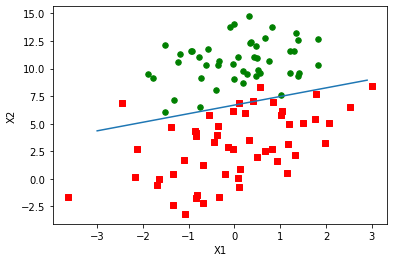

In [46]:
plot_best_fig(weights)

In [47]:
def stoc_grad_ascent0(data_mat, classlabels):
    m,n = np.shape(data_mat)
    alpha = 0.01
    weights = np.ones(n)
    for i in range(m):
        h = sigmoid(np.sum(data_mat[i] * weights))
        error = classlabels[i] - h
        weights  = weights + alpha * error * data_mat[i]
    return weights

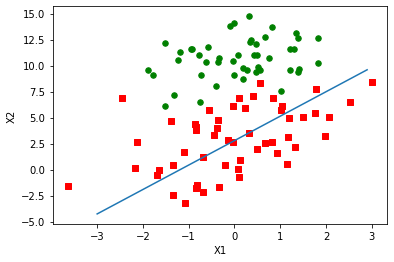

In [48]:
data_arr, label_mat = load_dataset()
weights = stoc_grad_ascent0(np.array(data_arr), label_mat)
plot_best_fig(weights)

In [84]:
def stoc_grad_ascent1(data_mat, classlabels, num_iter=150):
    m, n = np.shape(data_mat)
    weights = np.ones(n)
    for j in range(num_iter):
        data_index = list(range(m))
        for i in range(m):
            alpha = 4 / (1.0 + j + i) + 0.01    # 改进后的随机梯度上升，学习率是不断减少的
            rand_index = np.random.randint(0, len(data_index))
            h = sigmoid(np.sum(data_mat[rand_index]*weights))
            error = float(classlabels[rand_index]) - h 
            weights = weights + alpha * error * data_mat[rand_index]
            del(data_index[rand_index])
    return weights

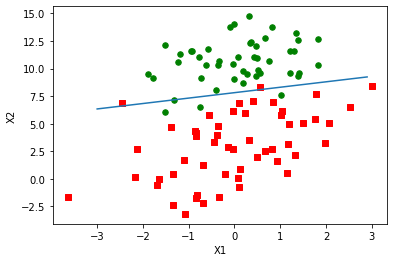

In [74]:
data_arr, label_mat = load_dataset()
weights = stoc_grad_ascent1(data_arr, label_mat)
plot_best_fig(weights)

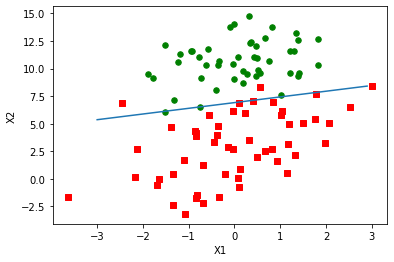

In [58]:
data_arr, label_mat = load_dataset()
weights = stoc_grad_ascent1(data_arr, label_mat, num_iter=500)
plot_best_fig(weights)

In [90]:
# 使用逻辑回归预测疝气的马的死亡率
def classify_vector(inx, weights):
    prob = sigmoid(np.sum(inx * weights))
    if prob > 0.5:
        return 1.0
    else:
        return 0.0

def colic_test():
    fr_train = open('horseColicTraining.txt')
    fr_test = open('horseColicTest.txt')
    training_set = []; training_labels = [] 
    for line in fr_train.readlines():
        cur_line = line.strip().split('\t')
        line_arr = []
        for i in range(21):
            line_arr.append(float(cur_line[i]))
        training_set.append(line_arr)
        training_labels.append(cur_line[21])
    train_weights = stoc_grad_ascent1(np.array(training_set), training_labels, 500)
    error_count = 0; num_test_vec = 0.0 
    for line in fr_test.readlines():
        num_test_vec += 1.0 
        cur_line = line.strip().split('\t')
        line_arr = []
        for i in range(21):
            line_arr.append(float(cur_line[i]))
        if int(classify_vector(np.array(line_arr), train_weights)) !=\
            int(cur_line[21]):
            error_count += 1 
    error_rate = float(error_count) / num_test_vec
    print("The error rate of this test is : %f" % error_rate)
    return error_rate

def multi_test():
    num_tests = 10
    error_sum = 0.0
    for k in range(num_tests):
        error_sum += colic_test()
    print("After %d iterations the average error rate is : %f" 
        % (num_tests, error_sum/float(num_tests)))

In [91]:
multi_test()

<ipython-input-41-614d3d4827dd>:11: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-inx))
The error rate of this test is : 0.283582
The error rate of this test is : 0.343284
The error rate of this test is : 0.388060
The error rate of this test is : 0.388060
The error rate of this test is : 0.313433
The error rate of this test is : 0.253731
The error rate of this test is : 0.328358
The error rate of this test is : 0.328358
The error rate of this test is : 0.373134
The error rate of this test is : 0.358209
After 10 iterations the average error rate is : 0.335821
